# **Palmer's Penguins**| PIC 16A | Discussion 2A
Group members: Kayla Blau, Bryan Palmero, Anya Smolentseva

# **Group Contributions Statement:**
The three of us worked together to import, sort, and clean the data, as well as create the feature selection. We all worked on creating the table scatterplot, bar chart histogram and box plot. We all worked together to write explanations for each figure.
Anya modeled with random forests, as well as wrote a function for the confusion matrix. Kayla created a multinomial linear regression model, and Bryan imported a support vector machine. We all met inside and out of class to ensure each of our parts ran
smoothly, as well as helped eachother with the writing portions.

# **1) Data Import**
The dataset this project will use is the Palmer's Penguins dataset, a csv file containing data of 344 penguins. We will import the necessary libraries needed to conduct our exploration and machine learning, import the data, give the dataset a simpler name
for future use and showcase what we'll be working with for the remainder of this project.

In [1]:
#import necessary libraries to import and for preliminary analysis
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
from sklearn import tree, preprocessing
warnings.filterwarnings("ignore")

In [2]:
#Importing the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
 # shorten the species name for simplicity
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [4]:
# show the first few rows of penguins dataset
penguins.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Here, we loaded the penguin data into the notebook and we can see the first few rows of the dataset. For this project, we will be working with the Adelie, Chinstrap, and Gentoo species, as well as the measured characteristics to develop the machine
learning model.

# **2) Exploratory Analysis**
Right off the bat, there are a flurry of columns with identifying features for all the different penguins. It's imperative that we take a look at what characteristics there are to use and what we need to find for our Machine Learning model.
This exploratory analysis should then help us find out which features will best help form our model – which ones provide the most data clusters and relevant information. We can also take a look back at what was found here and utilize it to troubleshoot or
compare to any future discoveries we make in future sections.

**Summary Table**



We will make a Summary Table! This will help us understand our data better, as well as a human likely could. Sifting through 344 rows and 17 columns of data simply isn't realistic for one typical person to do, nor does it allow us to easily analyze anything
about the data.

Summary tables are self-explanatory: it summarizes the dataset, depending on what columns and rows we are interested in. With the **Split-Apply-Combine** technique given by the groupby() method, the dataset is repurposed into whatever groups
the data is split into.

Generally speaking, this is better than just applying numpy functions to each column, because we can still preserve certain groups that are inherent to our dataset and still obtain the aggregated information about them.
The process (which is almost self-explanatory as well) works like this:


1.    **Split** our dataset into easily understood groups, like Culmen Length(mm) or Body Mass (g) using groupby() .
2.    **Apply** the .mean() function, or any other aggregation function to the new data
3.  **Combine** the split and applied data into a DataFrame







In [5]:
#Table comparing variables
def penguin_summary_table(group_cols, values_cols):
 '''
 This function creates the summary table. group_cols are the the primary columns and values_cols contain
 numerical measurements.
 Using the groupby() method it splits the data.
 Then it applies the np.mean and np.std function to procure a single value for each cell.
 It also rounds our values to two decimal places.
 '''
 table = penguins.groupby(group_cols)[values_cols].aggregate([np.mean,np.std]).round(2)
 return table

penguin_summary_table(["Species", "Island", "Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)",
 "Delta 15 N (o/oo)"])

Culmen Length (mm)        ... Delta 15 N (o/oo)      
                                         mean   std  ...              mean   std
Species   Island    Sex                              ...                        
Adelie    Biscoe    FEMALE              37.36  1.76  ...              8.77  0.40
                    MALE                40.59  2.01  ...              8.87  0.37
          Dream     FEMALE              36.91  2.09  ...              8.91  0.50
                    MALE                40.07  1.75  ...              8.98  0.32
          Torgersen FEMALE              37.55  2.21  ...              8.66  0.50
                    MALE                40.59  3.03  ...              8.92  0.41
Chinstrap Dream     FEMALE              46.57  3.11  ...              9.25  0.32
                    MALE                51.09  1.56  ...              9.46  0.39
Gentoo    Biscoe    .                   44.50   NaN  ...              8.04   NaN
                    FEMALE              45.56  2.05  ...              8.19  0.28
                    MALE                49.47  2.72  ...              8.30  0.25

[11 rows x 10 columns]

As explained in the docstring, we created a table that summarizes all of the mean values, as well as the standard deviation for each quantitative variable for each species of penguin. We thought it would be useful to summarize all the variables for each
species.

Preliminary Observations: On average, there is some variation in the different measurements of the penguins. Perhaps more evident are the differences in Culmen Length (mm) and Culmen Depth (mm) for the different species. MALE and
FEMALE species for each penguin largely differ as well in nearly every single measurement category. Male penguins on average, carry larger measurement values than female penguins.

**Visualize the Data**

Sure, a table is good and all, but with an animated thing like a penguin, let's try and visualize them – as well as a plot could. These can help us learn more from the data set. Building off our preliminary observations, a scatter plot will help us understand the
differences between Culmen Length (mm) and Culmen Depth (mm) for the various penguin species.

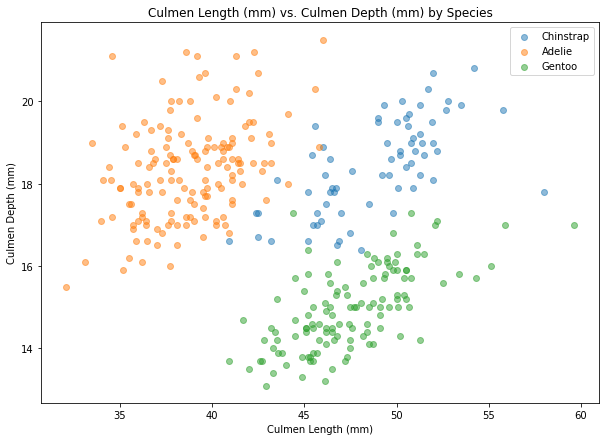

In [6]:
#Create the plot and the labels
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)",
 title = "Culmen Length (mm) vs. Culmen Depth (mm) by Species")
#Define the List of Species
species=set(penguins["Species"])
#For loop to go through the Species list and create the scatter plot
for x in species:
 s_species=penguins[penguins["Species"]==x]
 ax.scatter(s_species["Culmen Length (mm)"],s_species["Culmen Depth (mm)"],label=str.split(x)[0],alpha=0.5)
#Creation of Legend
ax.legend()

The preliminary observation seems to hold some merit: the different penguin species, as differentiated by their colors, appear to differ enough to create data clusters that are determined by their Culmen Depth and Culmen Length.

Besides Culmen Depth and Length, another thing to look at is the penguin frequency by species and island. This would be best explored through a bar graph.

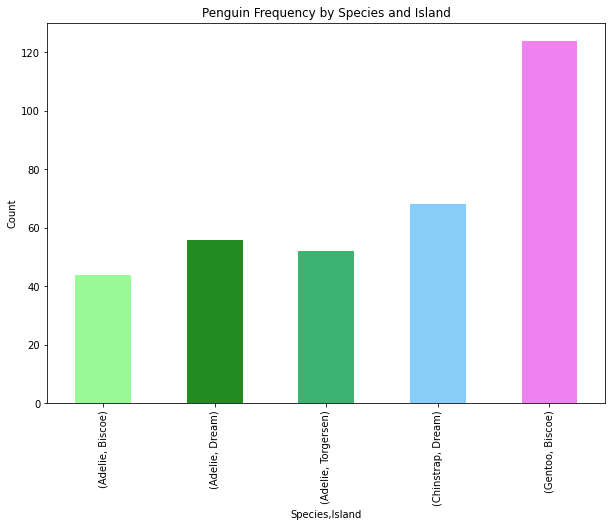

In [7]:
#Creation of plot
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(ylabel = "Count", title = "Penguin Frequency by Species and Island")
#Creation of barchart
groups=penguins.groupby(["Species","Island"]).size()
groups.plot.bar(color=["palegreen","forestgreen","mediumseagreen","lightskyblue","violet"])

It appears that the Adelie species appears on all three islands – Biscoe, Dream and Torgersen. However, Chinstrap only exists on Dream, while Gentoo makes its appearance solely on Biscoe.

To obtain more takeaways from this initial discovery, we will try to find data clusters by adding more features to consider. With Species and Island, adding a feature like Body Mass will give us a greater understanding of the dataset. This can be done using
a histogram to see if there are any overlaps.

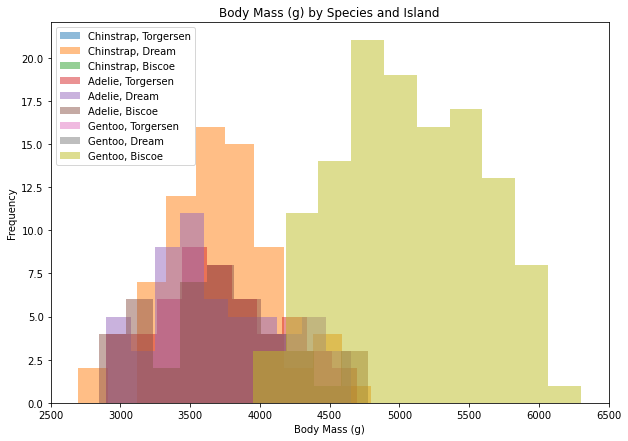

In [9]:
#Creation of Plot
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(xlabel = "Body Mass (g)", ylabel = "Frequency", title = "Body Mass (g) by Species and Island")
#Creation of species and island sets
species = set(penguins["Species"])
island = set(penguins["Island"])
#Nested for loop to iterate through species and island lists to form histogram
for x in species:
  for y in island:
    penguin_mass = penguins[(penguins["Species"] == x) & (penguins["Body Mass (g)"].notnull()) & (penguins["Island"] == y)]
    ax.hist(penguin_mass["Body Mass (g)"], label = x + ", " + y, alpha = 0.5)
#Legend and limit the x range
plt.xlim([2500, 6500])
ax.legend()

Here, we can see a histogram detailing the frequency of penguins by species and island, per Body Mass (g). Clearly, all of the different kinds of penguins overlap with at least one other type. However, Gentoos from Biscoe are off to its own, with penguins
around 4750 to 6500 grams all belonging to them. However, the greatest frequency of Gentoos by mass (~4750 grams) overlap with many other species.

There is much more exploration to be done, with many other columns and features left untouched. Let's explore Sex, as the preliminary observation stated that there is a difference in nearly every measurement when Sex is compared. To best visualize
this, let's utilize a box plot using the seaborn library.

[Text(0.5, 1.0, 'Body Mass (g) by species and sex')]

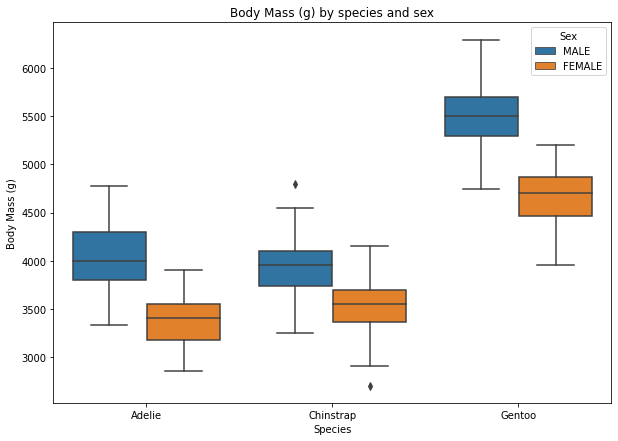

In [10]:
import seaborn as sns
penguins = penguins[penguins['Sex'] != '.'] #Remove penguins which have no data with regards to their sex
#Using the seaborn library, this creates a box plot
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(data = penguins, x="Species", y="Body Mass (g)", hue = "Sex")
ax.set(title = "Body Mass (g) by species and sex")

First of all, the data had to be manipulated further. Some penguins did not have a Sex measurement, and those penguins needed to be removed from this box plot. Now on to the observations. The preliminary observation was correct. There is a
significant difference in the range and interquartile range of the masses of each penguin species by Sex.

In addition, from the previous graph, Gentoo's are the heaviest by far. Adelie and Chinstrap penguins hover around a similar range. This falls in line with what we could see in the histogram.

# **3) Feature Selection**

Just based off our exploratory analysis, we could quickly see that there were certain features which created the most data clusters and differentiation. However, this was purely off the eye test and our visualizations. This section will help us discern which
one qualitative feature and which two quantitative features will form a preferred dataset for the models.

Here is an explanation of our code:

First, we dropped all of the rows in the dataset that contained NaN or empty values. This cleaned up and minimized our data.

We then turned our qualitative variables into numeric integers using le.fit_transform. This was a mandatory step in order to analyze the data. Continuing, we took 20% of our data and hid it from the model. Using the remaining 80%, we evaluated its
performance to see how our model would run on real data. This gave us insight on the optimal complexity of our model, and was useful for the next step in the feature section.

Lastly, we needed to find the best combination of three variables from the dataset. To do this, we used itertools.combinations and cross_val_score to see which combinations gave us the highest accuracy. We printed out a CV score for each possible
combination, and found that Culmen Depth, Culmen Length, and Sex had the highest correlation with a score of 0.992.

**Cleaning Data**

In [12]:
penguins = penguins[['Body Mass (g)',"Species","Flipper Length (mm)", "Body Mass (g)",'Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex', 'Island']]
penguins = penguins.dropna() #dropping empty values from data frame
penguins = penguins[penguins["Sex"] != "."] #dropping invalid values from "Sex" column
le = preprocessing.LabelEncoder()

In [13]:
from sklearn.model_selection import train_test_split
X = penguins.drop(['Species'], axis = 1)
y = penguins['Species']
X['Sex'] = le.fit_transform(X['Sex'])
X['Island'] = le.fit_transform(X['Island'])
y = le.fit_transform(y)

In [14]:
np.random.seed(1234)
trainX, testX, trainy, testy = train_test_split(X,y, test_size = 0.2) # hold out 20% of the data

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def check_column_score(cols):
 """
 Trains and evaluates a model via cross-validation on the columns of the data
 with selected indices
 """
 print("training with columns " + str(cols))
 LR = LogisticRegression(max_iter = 1000)
 return cross_val_score(LR, trainX[cols], trainy, cv = 5).mean()
combos = [['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Sex','Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Island', 'Body Mass (g)','Culmen Depth (mm)'],
 ['Sex','Island','Body Mass (g)']]
for cols in combos:
 x = check_column_score(cols)
 print("CV score is " + str(np.round(x, 3)))

training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.737
training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.992
training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.977
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.707
training with columns ['Island', 'Body Mass (g)', 'Culmen Depth (mm)']
CV score is 0.793
training with columns ['Sex', 'Island', 'Body Mass (g)']
CV score is 0.665


The highest cross validation score is 0.992 with the qualitative variable "Sex", and the two quantitative variables, "Culmen Length (mm)" and "Culmen Depth (mm)". Since this combination yields the highest cross validation score, we decided to use these
three variables for our machine learning models.

# **4) Modeling**

Let's prepare our data for modeling by cleaning it and splitting it!

In [16]:
np.random.seed(1234)
train,test = train_test_split(penguins, test_size = 0.2) # hold out 20% of the data
def prep_penguins_data(df):
 '''
 This cleans the data by only using the columns that we want, converting certain data values into numerical forms and dropping further columns.
 '''
 df = df[['Body Mass (g)',"Species","Flipper Length (mm)", "Body Mass (g)",'Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex', 'Island']]
 #dropping empty values from data frame
 df = df.dropna()
 df = df[df["Sex"] != "."]

 le=preprocessing.LabelEncoder()
 df['Sex']=le.fit_transform(df['Sex'])
 df['Species'] = le.fit_transform(df['Species'])
 df=df.drop(['Body Mass (g)', 'Flipper Length (mm)', 'Body Mass (g)', 'Island'], axis=1)
 X=df.drop(['Species'],axis=1)
 y=df['Species']
 return (X,y)

In [17]:
#creation of training and testing datasets
X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

In [18]:
X = penguins.drop(['Species'], axis = 1)
y = penguins['Species']
X['Sex'] = le.fit_transform(X['Sex'])
X['Island'] = le.fit_transform(X['Island'])
y = le.fit_transform(y)

**Applying Machine Learning Algorithms**

In this project, we used three differrent types of machine learning models to predict our data. We first used random forest, which combines many decision trees together to produce an optimal output. Then we used a multinomial logistic regression model
to categorize predicted values. Lastly, a vector support machine to find the marginal value.

Decision Matrix Function and Decision Region Function

In [19]:
#confusion matrix function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
def plot_confusion_matrix_(model,X_test, y_test):
 '''
 This function takes in a model and the testing data for the predictor and target variables.
 It then uses these inputs to plot a confusion matrix.
 '''
 y_test_pred = model.predict(X_test)
 c = confusion_matrix(y_test, y_test_pred)
 #visualize confusion matrix
 ax= plt.subplot()
 sns.heatmap(c, annot=True, fmt='g', ax=ax, cmap='Greens')
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels');
 ax.set_title('Confusion Matrix')
 ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
 ax.yaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])

In the cell block above, we have written a function that creates a 3 x 3 confusion matrix. Typically, a confusion matrix is used to evaluate the performance of a machine learning model. A confusion matrix works by comparing the actual values with the
values predicted by the machine learning model. In the following confusion matrices, the columns indicate the predicted values while the rows indicate the actual values.

In [20]:
#decision region function
def plot_regions(c, X,y):
 '''
 This function takes in the model, the predictor variables, and the target variable as its arguments.
 The function then uses these inputs in order to plot a decision region.
 '''
 # for convenience, give names to the two columns of the data
 fig, ax = plt.subplots(1,2,figsize=(10,7))
 x0 = X['Culmen Length (mm)']
 x1 = X['Culmen Depth (mm)']

 # create a grid
 grid_x = np.linspace(x0.min(),x0.max(),501)
 grid_y = np.linspace(x1.min(),x1.max(),501)
 xx, yy,zz = np.meshgrid(grid_x, grid_y,np.array([0,1])) #female corresponds with 0, male corresponds with 1

 # extract model predictions, using the np.c_ attribute to join together the two parts of the grid.
 # array.ravel() converts an multidimensional array into a 1d array, and we use array.reshape() to turn the resulting predictions p back into 2d
 XX = xx.ravel()
 YY = yy.ravel()
 ZZ=zz.ravel()
 XY = np.c_[XX, YY]
 XYZ=np.c_[XX,YY,ZZ]
 p = c.predict(XYZ)
 p = p.reshape(xx.shape)
 # use contour plot to visualize the predictions
 ax[0].contourf(xx[:,:,0], yy[:,:,0], p[:,:,0], cmap = "jet", alpha = 0.2)
 ax[1].contourf(xx[:,:,1], yy[:,:,1], p[:,:,1], cmap = "jet", alpha = 0.2)

 # plot the data
 ax[0].scatter(x0[X['Sex']==0], x1[X['Sex']==0], c = y[X['Sex']==0], cmap = "jet")
 ax[1].scatter(x0[X['Sex']==1],x1[X['Sex']==1],c=y[X['Sex']==1],cmap="jet")
 ax[0].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Female")
 ax[1].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Male")

 plt.tight_layout()

In the cell block above, we have written a function that creates a decision region for each specified machine learning model. Decision regions provide visualizations of strengths and weaknesses of machine learning models as well as how the models make
decisions.The different contours where each decision region meets is called the decision boundaries.

# **Modeling with Random Forests**

Random forests consist of many individual decision trees. Each decision tree creates its own prediction and the prediction with the most votes becomes the model's prediction

In [21]:
#let's compare!
from sklearn.ensemble import RandomForestClassifier
#this will be our base
rf = RandomForestClassifier(max_depth = 3)
# 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times.
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
cv_scores.mean()

0.9696581196581198

Our model has a base score 0.97. Let's see if this can be improved! We will do this by finding the optimal depth for our Random Forests model

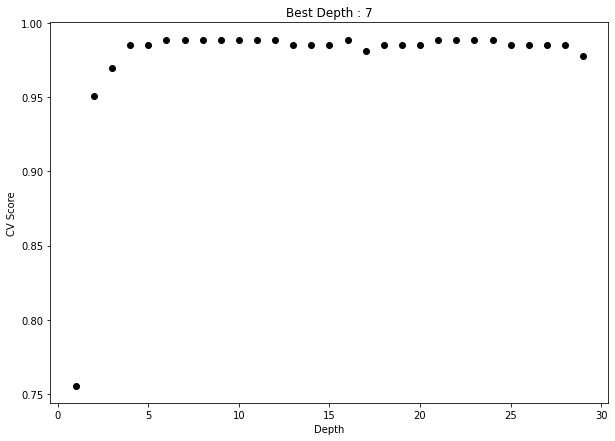

In [22]:
#now let's find the optimal depth for our random forests
fig, ax = plt.subplots(1,figsize=(10,7))
best_score = 0
for d in range(1,30):
  rf = RandomForestClassifier(max_depth=d, n_jobs=-1)
  cv_score = cross_val_score(rf, X_train, y_train, cv=10).mean()
  ax.scatter(d, cv_score, color = "black")
  if cv_score > best_score:
    best_depth = d
    best_score = cv_score
    best_rf=rf
l = ax.set(title = "Best Depth : " + str(best_depth), xlabel = "Depth", ylabel = "CV Score")

In [23]:
rf = RandomForestClassifier(max_depth = best_depth)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9850746268656716

Our cross validation score slightly improved. Yay!

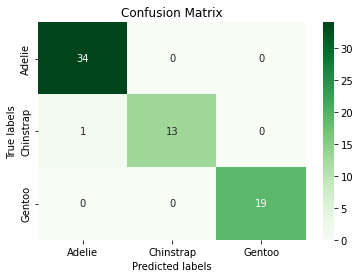

In [24]:
plot_confusion_matrix_(rf,X_test, y_test)

This is the confusion matrix for the Random Forests machine learning model. The model correctly predicted 34 Adelie penguins to be Adelie penguins. However, it incorrectly predicted one Chinstrap penguin to be an Adelie penguin. The model correctly
predicted 13 Chinstrap penguins to be Chinstrap penguins and 19 Gentoo penguins to be Gentoo penguins. Overall, the model did really well in predicting the different penguin species. However, it is important to be cautious when we observe such
results.

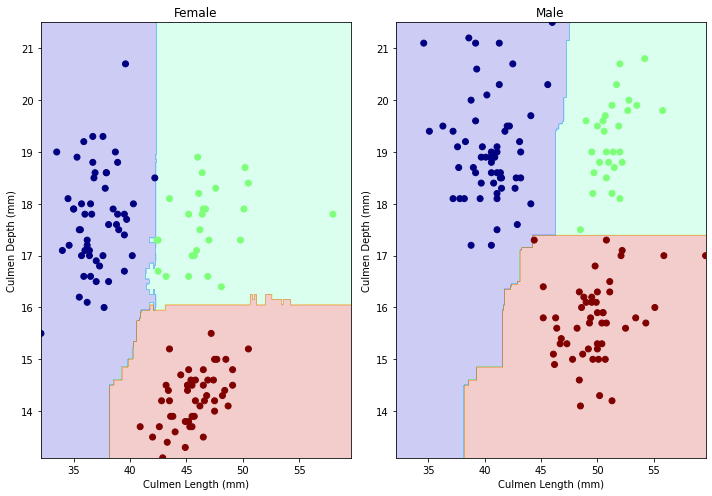

In [25]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
plot_regions(RF, X_train, y_train)

Based on the decision regions, the Random Forests model is very successful in predicting the penguin species. In the decision region corresponding to the female penguins and the male penguins, the scattered dots are in their respective decision
boundaries. However, once again, the success of these results indicate that we should be cautious.

# **Multinomial Logistic Regression**

Multinomal logistic regression uses independent variables to estimate two or more categorical outcomes of the dependent variable. In this project, we use this model to predict how well our predictions of Culmen length and depth fit the Penguins
dataset.

**1) Cross Validation**

Best C:  0.5
Best score:  0.9887464387464387


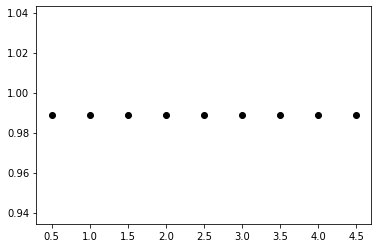

In [28]:
best_comp = 0
bestlr_score = 0
fig, ax = plt.subplots(1)
for c in np.arange(0.5, 5, 0.5): # find optimal parameter
  MLR = LogisticRegression(multi_class='multinomial',max_iter = 1000, C = c)
  cv_score = cross_val_score(MLR, trainX, np.ravel(trainy), cv=10).mean()
  ax.scatter(c, cv_score, color = "black") # plot cv score for each c

 # stores the best model
  if cv_score > bestlr_score:
    best_comp = c
    bestlr_score = cv_score
    M = MLR
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
cv_scores.mean()
print("Best C: ", best_comp)
print("Best score: ", bestlr_score)

A C value of 0.5 indicates that the model predictions and actual data are not significantly correlated. The accuracy score is also pretty high, at 0.988, which means there could be a possible error with our previous calculations. Thus the multinomial linear
regression model has its doubts, so we observe the data with caution.

In [29]:
MLR=LogisticRegression(multi_class='multinomial',C=best_comp)
MLR.fit(X_train, y_train,)
MLR.score(X_test, y_test)

0.9701492537313433

**2)Plotting the decision regions**

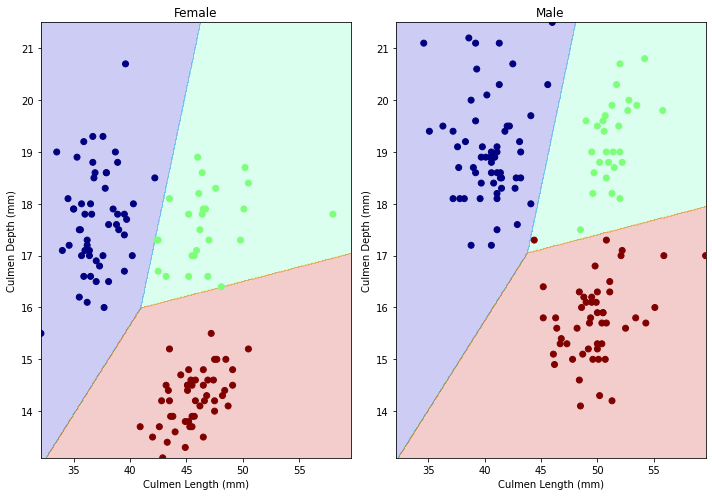

In [30]:
plot_regions(MLR, X_train, y_train)

**3) Plotting the confusion matrix**

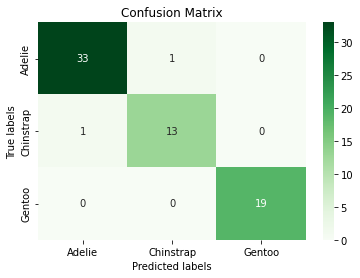

In [31]:
plot_confusion_matrix_(MLR,X_test, y_test)

The confusion matrix takes each class and summarizes the number of incorrect and correct predictions. It does this by comparing our actual target values with our machine learning outcome values. Based on this confusion matrix, 33 Adelie's were
predicted accurately and 1 was thought to be a Chinstrap, and 1 Chinstrap was thought to be an Adelie.

# **Support-Vector Machines (SVM)**

Support Vector Machines create "sections" that divide the dataset and develop more curvier boundaries, with regards to the decision region. This can help differentiate the different species in a much more robust way and help fine tune individual outliers
that may fall out of the data.

In [32]:
from sklearn import svm
SVM = svm.SVC()

**1.) Finding the optimal parameter**

Best C:  1.0
Best score:  0.9696581196581195


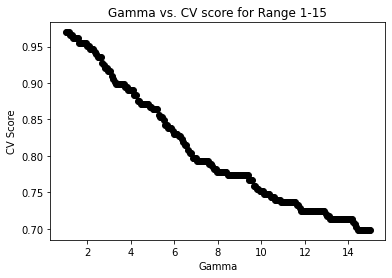

In [33]:
fig, ax = plt.subplots(1)
best_score = 0
best_gamma = 0
for d in np.linspace(1, 15, 200):
  SVM = svm.SVC(gamma = d)
  cv_score = cross_val_score(SVM, X_train, y_train, cv = 10).mean()
  ax.scatter(d, cv_score, color = 'black')
  if cv_score > best_score:
    best_gamma = d
    best_score = cv_score
l = ax.set(title = "Gamma vs. CV score for Range 1-15", xlabel = "Gamma", ylabel = "CV Score", alpha = 0.5)
print("Best C: ", str(best_gamma))
print("Best score: ", str(best_score))

In this graph, the cross validation score decreases as Gamma increases. This means as the model increases its complexity parameter, the performance of the data becomes worse. Therefore, the best complexity or best value for Gamma is when the
model is least complex or 1. From there, the corresponding CV score gives us an accuracy of 0.969.

Let's try going through more iterations of the data to see if we can find a higher accuracy score!

Best C:  0.18000000000000002
Best score:  0.9847578347578347


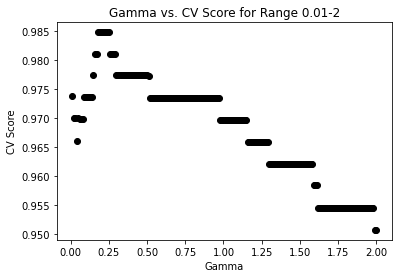

In [34]:
fig, ax = plt.subplots(1)
best_score = 0
best_gamma = 0
for d in np.linspace(0.01, 2, 200): # this time, we are checking 200 possible values between 0.01 and 2.0
  SVM = svm.SVC(gamma = d)
  cv_score = cross_val_score(SVM, X_train, y_train, cv = 10).mean()
  ax.scatter(d, cv_score, color = 'black')
  if cv_score > best_score:
    best_gamma = d
    best_score = cv_score
l = ax.set(title = "Gamma vs. CV Score for Range 0.01-2", xlabel = "Gamma", ylabel = "CV Score", alpha = 0.5)
print("Best C: ", str(best_gamma))
print("Best score: ", str(best_score))

Instead of checking complexity parameter values from 1-15, this checks 200 values from 0.01 to 2. This resulted in a best gamma value of 0.18 and a corresponding cross validation score of 0.984. This CV score is higher than what was found previously
and is not high enough to warrant a concern for overfitting.

In [35]:
SVM = svm.SVC(gamma = best_gamma)
SVM.fit(X_train, y_train,)
SVM.score(X_test, y_test)

0.9701492537313433

On the test data, we get an accuracy of 0.97. It gives us reason to be concerned about the algorithm because it is high, however it may not be overfitted

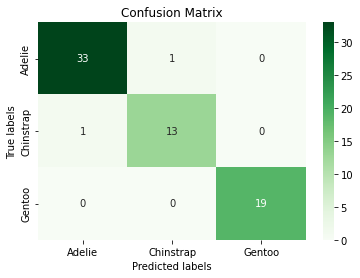

In [36]:
plot_confusion_matrix_(SVM,X_test, y_test)

It predicts 33 Adelie penguins correctly, 13 chinstrap penguins correctly and 19 gentoo penguins correctly. One chinstrap is misidentified as an Adelie and one Adelie is misidentified as a Chinstrap.

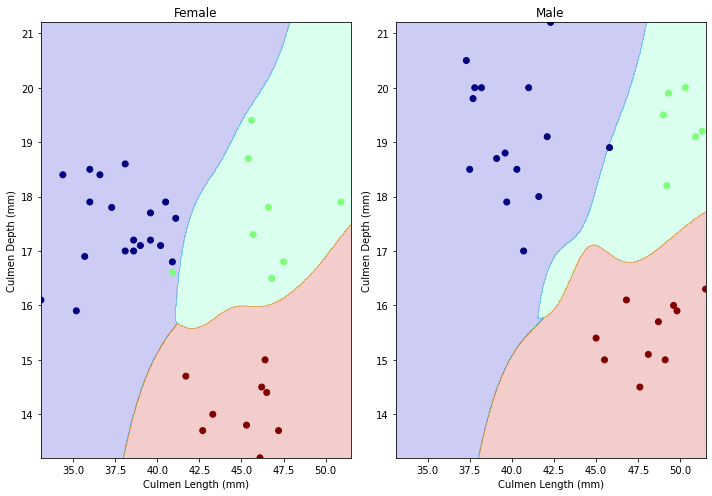

In [37]:
plot_regions(SVM, X_test,y_test)

The dots appear to mostly fit their regions. There is one clear anomaly in the Female area with a penguin in the incorrect region. Here, as mentioned before the regions formed are more curvier.

# **Discussion**

**Analysis of models:**
The findings in our analysis suggests that the best model is the Random Forest Model using Sex Culmen length, and Culmen depth as our features when predicting penguin species. With 80% of the data used to train all of our algorithms, the model
showed an accuracy of appoximately 98%.

Despite the Random Forest model having the highest accuracy score out of all the machine learning models – with Support Vector Machines and Multinomial Logistic Regression having an accuracy score of approximately 97% – it took the longest time
to generate the optimal complexity parameter at around two minutes. If these algorithms are extrapolated to fit a larger sample size, the length of time to generate could present an issue and could make the Random Forest model less favorable despite its
higher accuracy.

There is another possible issue with the Random Forest model, its accuracy score may have been too high at 0.98 . This could be a result of overfitting, which happens when the predicted values from the function are too closely related to the actual
data.

**How could our model be improved?**

The data could be expanded. There is relatively small sample size and as such it was relatively easy for us to obtain a high accuracy value. Small sample size can represent a bias because it may not be truly representative of what is actually happening.

**Possible dangers:**

Our model favors penguins that are closer to their species mean, however, the penguins with the largest variance have a higher probability of being incorrectly predicted. Another danger to consider is that we are not sure how accurate the dataset we
were given is. If we were to actually use this data for scientific research, we would need to ask questions like,
1. *“Did the penguins migrate between islands?”*
2. *“Did the population size change overtime?”*

Questions like these are necessary for ensuring our data and predictions are actually accurate, as a change in a variable could affect our entire distribution.

**Real world application:**

As machine learning advances in our daily lives, the impact it has could potentially cause more harm than good. As we can see with our machine learning models, the results cannot be taken for granted, as there can be uncertainty or bias in the process.
Although the results of this project won’t affect anything or anyone on a large scale, it is important tp recognize and understand the results of this project. We can clearly see that unless given ‘perfect’ data, which is unrealistic in the real world, our
machine learning outputs will always have some error. We also learned that different machine models have different accuracy levels and produce better outputs than others.